In [1]:
import pandas as pd

In [2]:
work_tbl= pd.read_pickle('work_tbl_pickle.pkl')

In [3]:
work_tbl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15583 entries, 1003002379 to 1992994347
Data columns (total 13 columns):
gender_l                15583 non-null object
state_l                 15583 non-null object
type                    15583 non-null object
report_year             15583 non-null object
zip_base                15583 non-null object
bene_day_srvc_cnt       15583 non-null float64
submitted_delta_perc    15583 non-null float64
allowed_delta_perc      15583 non-null float64
quality_measures        15583 non-null object
electronic_measures     15583 non-null object
years_experience        15583 non-null float64
prov_qual_indic         15583 non-null float64
hmaxscore               15583 non-null float64
dtypes: float64(6), object(7)
memory usage: 1.7+ MB


In [4]:
work_tbl=work_tbl[work_tbl['hmaxscore']>0]
work_tbl.drop('prov_qual_indic', axis=1, inplace=True)
work_tbl.drop('gender_l', axis=1, inplace=True)
#work_tblx.head()

In [5]:
#df.ix[df.my_channel > 20000, 'my_channel'] = 0
#work_tbl.ix[work_tbl['quality_measures'] =='0','quality_measures']='N'
#rows_to_change = work_tbl['quality_measures'] == '0'
#df.loc[rows_to_change, 'status'] = 'DUP'

#work_tbl.quality_measures[work_tbl['quality_measures' ==0]] = 'N'
#[work_tbl['quality_measures'] ==0 , 'quality_measures'] = 'N'

In [6]:
#create dummy columns for 'gender_l',
cols_to_transform = [ 'state_l', 'zip_base', 'quality_measures', 'electronic_measures' ]
#df = pd.get_dummies(df, columns=['type'])
#http://stackoverflow.com/questions/36285155/pandas-get-dummies
df = pd.get_dummies(work_tbl, columns = cols_to_transform )
df.columns.tolist()

['type',
 'report_year',
 'bene_day_srvc_cnt',
 'submitted_delta_perc',
 'allowed_delta_perc',
 'years_experience',
 'hmaxscore',
 'state_l_WA',
 'zip_base_92874',
 'zip_base_97031',
 'zip_base_98001',
 'zip_base_98002',
 'zip_base_98003',
 'zip_base_98004',
 'zip_base_98005',
 'zip_base_98006',
 'zip_base_98007',
 'zip_base_98008',
 'zip_base_98011',
 'zip_base_98012',
 'zip_base_98013',
 'zip_base_98014',
 'zip_base_98019',
 'zip_base_98020',
 'zip_base_98021',
 'zip_base_98022',
 'zip_base_98023',
 'zip_base_98026',
 'zip_base_98027',
 'zip_base_98028',
 'zip_base_98029',
 'zip_base_98030',
 'zip_base_98031',
 'zip_base_98032',
 'zip_base_98033',
 'zip_base_98034',
 'zip_base_98036',
 'zip_base_98037',
 'zip_base_98038',
 'zip_base_98040',
 'zip_base_98042',
 'zip_base_98043',
 'zip_base_98045',
 'zip_base_98052',
 'zip_base_98055',
 'zip_base_98056',
 'zip_base_98057',
 'zip_base_98058',
 'zip_base_98059',
 'zip_base_98065',
 'zip_base_98070',
 'zip_base_98072',
 'zip_base_98074',


In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#from roc import plot_roc

In [8]:
#df['gender_l_F'].value_counts()
#df["quality_measures"] = df["quality_measures"] == 'Y'
#df["electronic_measures"] = df["electronic_measures"] == 'Y'
#df['Churn?'] = df['Churn?'] == 'True.

In [9]:
y = df.pop('type').values

In [10]:
X = df.values

In [11]:
# 6. Use sklearn's train_test_split to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# 7. Use sklearn's RandomForestClassifier to build a model of your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
# 8. What is the accuracy score on the test data?
print "8. score:", rf.score(X_test, y_test)

8. score: 0.558186397985


In [14]:
y_predict = rf.predict(X_test)
print "9. confusion matrix:"
print confusion_matrix(y_test, y_predict)

9. confusion matrix:
[[110   1   0   0   0   1   1   1   3   0   0   0   2   0  10   0]
 [  8  30   0   0   0   0   2   0   0   2   0   0   1   0   8   0]
 [  2   0  46   0   6   0   3   1  12   1   2   0   1   0   0   0]
 [  0   0   0   0   0   0   4   0   0   1   0   0   0   0   0   0]
 [  3   0   0   0 113   2   3   0   0   1   1   0   0   0   4   0]
 [  2   0   0   0   0  45   5   1   1   2   1   0   1   0   7   0]
 [  7   0   5   2   2   1 302   3  62  36   0   0   3   0  16   0]
 [  4   0   1   0   0   0  23  16  12   2   0   0   5   0   2   0]
 [  6   1   8   1   3   1 101   8 209  19   1   0   7   0   9   2]
 [  3   1   2   0   6   7  50   2  16 113   0   0   2   0  37   1]
 [  0   0   4   0   4   0  13   1   5   3  11   0   0   0   2   1]
 [  0   0   0   0   0   0   6   0   0   2   1   0   0   0   0   0]
 [  3   0   4   0   8   0  16  13  15   2   0   0  41   0   5   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   1   0   1   0]
 [ 17   3   0   0   4   7  30   3  14  64

In [15]:
#print "10. precision:", precision_score(y_test, y_predict)
#print "    recall:", recall_score(y_test, y_predict)

In [16]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True)
rf.fit(X_train, y_train)
print "11: accuracy score:", rf.score(X_test, y_test)
print "    out of bag score:", rf.oob_score_

11: accuracy score: 0.605541561713
    out of bag score: 0.614441645676


In [17]:
print pd.unique(y)

['Diagnostic Radiology' 'General Surgery' 'Family Practice' 'Chiropractic'
 'Physician Assistant' 'Internal Medicine' 'Orthopedic Surgery'
 'Emergency Medicine' 'Nurse Practitioner' 'Psychiatry' 'Cardiology'
 'Anesthesiology' 'Ophthalmology' 'CRNA' 'Optometry' 'Physical Therapist']


In [27]:
#roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
zip(df.columns[1:9], rf.feature_importances_)

[('bene_day_srvc_cnt', 0.0),
 ('submitted_delta_perc', 0.15126748103029367),
 ('allowed_delta_perc', 0.17099173777742663),
 ('years_experience', 0.14293433584144488),
 ('hmaxscore', 0.11576181358171582),
 ('state_l_WA', 0.078377978494466094),
 ('zip_base_92874', 0.0),
 ('zip_base_97031', 3.8066102076404693e-05)]

In [18]:
feature_importances = np.argsort(rf.feature_importances_)
print "12: top five:", list(df.columns[feature_importances[-1:-6:-1]])

12: top five: ['submitted_delta_perc', 'bene_day_srvc_cnt', 'allowed_delta_perc', 'years_experience', 'hmaxscore']


In [19]:
n = 10 # top 10 features

importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [20]:
# # Print the feature ranking
# print("Feature ranking:")

# for f in range(n):
#     print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
# plt.xticks(range(10), indices)
# plt.xlim([-1, 10])
# plt.show()

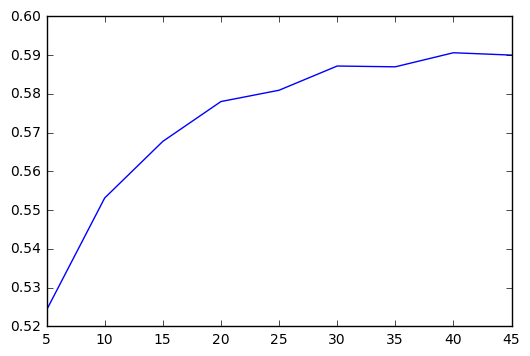

In [21]:
# 14. Try modifying the number of trees
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in xrange(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_trees, accuracies)
plt.show()

In [22]:
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           #precision_score(y_test, y_predict), \
           #recall_score(y_test, y_predict)

print "16. Model, Accuracy, Precision, Recall"
print "    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5)
print "    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test)
print "    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test)
print "    SVM:", get_scores(SVC, X_train, X_test, y_train, y_test)
print "    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test)

16. Model, Accuracy, Precision, Recall
    Random Forest: (0.5768261964735516,)
    Logistic Regression: (0.43375314861460956,)
    Decision Tree: (0.48816120906801008,)
    SVM: (0.31032745591939548,)
    Naive Bayes: (0.17682619647355163,)
